In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import selenium
from urllib.parse import  urlparse
import time
import lxml
from urllib.request import urlopen
from selenium.webdriver.common.keys import Keys
import numpy as np
import pandas as pd
import re
import pickle
from contextlib import suppress
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, KFold
from tqdm import tqdm

import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'

In [3]:
from collections import Counter
import os
paths = os.listdir("C:/netsong7/pythonwork/AI/finalproject/data cleaning(final)")

In [4]:
df_apple = pd.read_csv("C:/netsong7/pythonwork/AI/finalproject/data cleaning(final)/"+paths[2], encoding='utf-8-sig')
print(paths[2])
df_samsung = pd.read_csv("C:/netsong7/pythonwork/AI/finalproject/data cleaning(final)/"+paths[3], encoding='utf-8-sig')
print(paths[3])
df_xiaomi = pd.read_csv("C:/netsong7/pythonwork/AI/finalproject/data cleaning(final)/"+paths[4], encoding='utf-8-sig')
print(paths[4])

cafe_Apple.csv
cafe_Samsung.csv
cafe_Xiaomi.csv


In [5]:
del df_apple["Unnamed: 0"]
df_apple.columns = ["title", "review", "date"]
df_apple.head()

,title,review,date
0,인치 가지고 왔습니다,칩을 품은 아이패드 프로 하나 가지고왔습니다 게임용이 주목적으로 구입했고 휴대성도 ...,2021.08.11. 21:02
1,미니,NaN,2021.08.11. 14:14
2,애플펜슬 교환받고 왔는데요ㅠ,아이패드 프로 세대 인치 사용한지는 년 넘었어요굿노트에서 자꾸 필기 오류가 생겨서 ...,2021.08.11. 13:36
3,패드로 책 읽으시는 분 계신가요,출퇴근할 때 전철에서 아이패드로 전자책 읽는데눈이 좀 아픈 것 같아요 ㅜㅜㅜㅜ아이패...,2021.08.11. 09:26
4,아이패드펜촉 팁 글씨필기감,도움말라이센스 동영상 인코딩 중입니다분 이상 소요될 수 있으며 ...,2021.08.11. 01:36


In [6]:
del df_samsung["Unnamed: 0"]
df_samsung.columns = ["review", "date"]
df_samsung.head()

,review,date
0,사람들이 불만이 많아 걱정 많이했습니다사고 난 1일7일 발열 느껴졌습니다하지만 이 ...,2021.08.12. 10:54
1,s10 5g에서 기변했는데 카페글에 발열 심하다는 얘기가 많아 불안했지만 카메라가...,2021.08.12. 10:39
2,s21울트라로 기변했습니다침수된 s20는 as비용만 8090만원이 나오는지라저렴하게...,2021.08.10. 07:09
3,안녕하세요4월 말에 구매해서 지금까지 울트라 잘 사용하고 있습니다s21시리즈 문제때...,2021.08.09. 17:50
4,사용기종 s21최대가 3435도고 카메라 사용시 36도까지 찍었네요,2021.08.09. 17:00


In [7]:
df_xiaomi.head()

,title,review,keyword,date
0,홍미노트 시리즈의 고질병 2,홍미노트 프로 프로 프로 프로까지 쭉 써오고 있는데사용 중에 가장 불편하고 짜증...,스마트폰,2021.08.11. 03:56
1,홍미노트 틴 츠로(10 프로) 터치후기,내손이 똥손인거 이 폰이 똥 폰인가내 손이 똥손일까요 이 폰이 똥폰일까요아무리써...,스마트폰,2021.08.11. 01:33
2,미10라에서 미10라줌 롬으로 교체 사용기,안녕하세요미라 단말기에 미라줌 롬 교체기 입니다교체 이유는 주간롬 사용 및 베터...,스마트폰,2021.08.11. 00:44
3,아이폰에서 홍미노트 10 바꾼 후 간단한 일주일 후기입니다.,안녕하세요 기존에 아이폰 미니를 쓰다가안드로이드도 써보고 싶고 샤오미도 궁금하고...,스마트폰,2021.08.07. 20:37
4,poco m3 pro 5g 일주일 사용기 (수정),어느덧 포코 프로 를 받고 사용한지 일주일이 다되가네요이전에 간단하게 짧은 후...,스마트폰,2021.08.07. 11:57


In [8]:
df_apple.drop_duplicates(subset = ['review'], inplace=True) # 중복 제거
df_apple['review'] = df_apple['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df_apple['review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df_apple = df_apple.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(df_apple))

전처리 후 테스트용 샘플의 개수 : 2250


C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [9]:
df_samsung.drop_duplicates(subset = ['review'], inplace=True) # 중복 제거
df_samsung['review'] = df_samsung['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df_samsung['review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df_samsung = df_samsung.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(df_samsung))

전처리 후 테스트용 샘플의 개수 : 1422


C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [10]:
df_xiaomi.drop_duplicates(subset = ['review'], inplace=True) # 중복 제거
df_xiaomi['review'] = df_xiaomi['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df_xiaomi['review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df_xiaomi = df_xiaomi.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(df_xiaomi))

전처리 후 테스트용 샘플의 개수 : 600


C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


# 네이버 카페 리뷰 회사 별 리뷰 pie plot

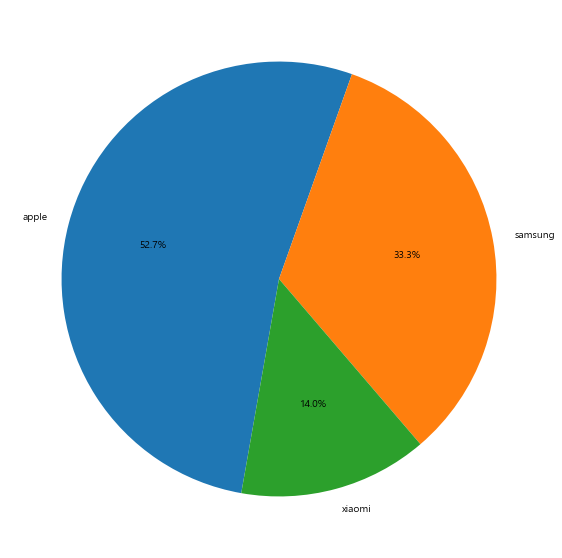

전처리 후 테스트용 샘플의 개수 : 4272


In [11]:
plt.figure(figsize=(12, 10))
ratio = [len(df_apple), len(df_samsung), len(df_xiaomi) ]
labels = ["apple","samsung","xiaomi"]



plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()
print('전처리 후 테스트용 샘플의 개수 :',len(df_apple)+len(df_samsung)+len(df_xiaomi))


# 네이버 카페 리뷰 길이 분포

리뷰의 최대 길이 : 23341
리뷰의 평균 길이 : 335.19955555555555


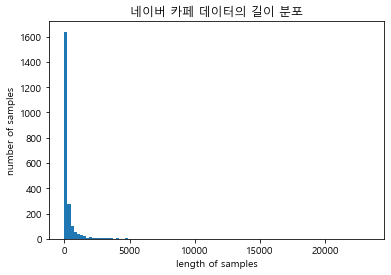

In [12]:
print('리뷰의 최대 길이 :',max(len(l) for l in df_apple['review']))
print('리뷰의 평균 길이 :',sum(map(len, df_apple['review']))/len(df_apple['review']))
plt.hist([len(s) for s in df_apple['review']], bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.title("네이버 카페 데이터의 길이 분포")
plt.show()

In [13]:
df_apple['review'] = df_apple['review'].str.replace('^ +', "")
df_apple['review'].replace('', np.nan, inplace=True)
print(df_apple.isnull().sum())

df_apple.loc[df_apple.review.isnull()][:5]

df_apple = df_apple.dropna(how = 'any')
print(len(df_apple))

title     0
review    0
date      0
dtype: int64
2250


C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


# 네이버 카페 리뷰 회사 별 리뷰 길이 분포

리뷰의 최대 길이 : 23341
리뷰의 평균 길이 : 335.18


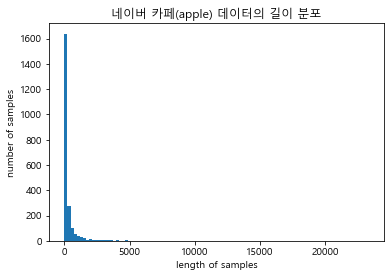

In [14]:
print('리뷰의 최대 길이 :',max(len(l) for l in df_apple['review']))
print('리뷰의 평균 길이 :',sum(map(len, df_apple['review']))/len(df_apple['review']))
plt.hist([len(s) for s in df_apple['review']], bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.title("네이버 카페(apple) 데이터의 길이 분포")
plt.show()

In [15]:
df_samsung['review'] = df_samsung['review'].str.replace('^ +', "")
df_samsung['review'].replace('', np.nan, inplace=True)
print(df_samsung.isnull().sum())

df_samsung.loc[df_samsung.review.isnull()][:5]

df_samsung = df_samsung.dropna(how = 'any')
print(len(df_samsung))

review    1
date      0
dtype: int64
1421


C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


리뷰의 최대 길이 : 7624
리뷰의 평균 길이 : 367.8029556650246


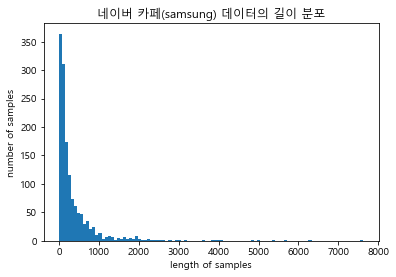

In [16]:
print('리뷰의 최대 길이 :',max(len(l) for l in df_samsung['review']))
print('리뷰의 평균 길이 :',sum(map(len, df_samsung['review']))/len(df_samsung['review']))
plt.hist([len(s) for s in df_samsung['review']], bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.title("네이버 카페(samsung) 데이터의 길이 분포")
plt.show()

In [17]:
df_xiaomi['review'] = df_xiaomi['review'].str.replace('^ +', "")
df_xiaomi['review'].replace('', np.nan, inplace=True)
print(df_xiaomi.isnull().sum())

df_xiaomi.loc[df_xiaomi.review.isnull()][:5]

df_xiaomi = df_xiaomi.dropna(how = 'any')
print(len(df_xiaomi))

title      0
review     2
keyword    0
date       0
dtype: int64
598


C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


리뷰의 최대 길이 : 11025
리뷰의 평균 길이 : 984.2993311036789


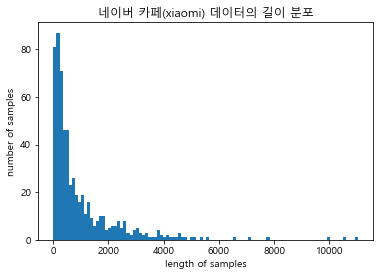

In [18]:
print('리뷰의 최대 길이 :',max(len(l) for l in df_xiaomi['review']))
print('리뷰의 평균 길이 :',sum(map(len, df_xiaomi['review']))/len(df_xiaomi['review']))
plt.hist([len(s) for s in df_xiaomi['review']], bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.title("네이버 카페(xiaomi) 데이터의 길이 분포")
plt.show()

# 네이버 카페 리뷰 회사 별 형태소 랭크

In [19]:
okt = Okt()
stopwords = pd.read_table("C:/netsong7/pythonwork/AI/stopwords1.txt", encoding='utf-8-sig', header=None,error_bad_lines=False)
stopwords = list(stopwords[0])

b'Skipping line 276: expected 1 fields, saw 2\n'


In [20]:
# apple
positve = []
for sentence in df_apple["review"]:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    positve.append(temp_X)
words_positve = np.hstack(positve)
words_positve_count = Counter(words_positve)
print(words_positve_count.most_common(200))
print("==================================================================================================================")

[('있다', 3196), ('되다', 2290), ('보다', 2144), ('이다', 2062), ('사용', 2015), ('프로', 1369), ('없다', 1365), ('좋다', 1211), ('애플', 1100), ('않다', 1048), ('맥북', 984), ('수', 932), ('인치', 927), ('쓰다', 905), ('들다', 874), ('더', 870), ('생각', 870), ('하고', 868), ('아이패드', 860), ('키', 835), ('아이폰', 830), ('안', 823), ('만', 819), ('요', 807), ('정도', 761), ('아니다', 758), ('구매', 751), ('적', 747), ('분', 734), ('보드', 730), ('자다', 711), ('중', 671), ('너무', 670), ('워치', 658), ('세대', 641), ('작업', 624), ('그렇다', 609), ('되어다', 569), ('해보다', 566), ('맥', 561), ('영상', 559), ('가다', 542), ('오다', 540), ('케이스', 528), ('받다', 517), ('제품', 515), ('많이', 509), ('문제', 501), ('후', 500), ('배터리', 492), ('나오다', 483), ('써다', 478), ('ㅎㅎ', 469), ('크다', 463), ('년', 462), ('화면', 458), ('면', 445), ('많다', 443), ('때문', 440), ('그냥', 436), ('싶다', 434), ('못', 429), ('인데', 427), ('정말', 422), ('거', 419), ('형', 419), ('매직', 416), ('미니', 411), ('사다', 401), ('오늘', 395), ('고민', 385), ('서', 383), ('사진', 381), ('에는', 378), ('느낌', 374), ('부분', 372), ('기', 36

In [21]:
# samsung
positve = []
for sentence in df_samsung["review"]:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    positve.append(temp_X)
words_positve = np.hstack(positve)
words_positve_count = Counter(words_positve)
print(words_positve_count.most_common(200))
print("==================================================================================================================")

[('있다', 2158), ('보다', 1693), ('되다', 1573), ('이다', 1430), ('사용', 1406), ('좋다', 1188), ('없다', 1167), ('노트', 1134), ('쓰다', 959), ('화면', 807), ('폰', 799), ('않다', 777), ('더', 700), ('정도', 696), ('만', 667), ('적', 666), ('요', 655), ('안', 641), ('생각', 631), ('너무', 630), ('발열', 617), ('카메라', 607), ('아니다', 570), ('하고', 562), ('구매', 553), ('들다', 533), ('울트라', 520), ('받다', 511), ('분', 509), ('써다', 505), ('수', 501), ('가다', 493), ('못', 490), ('자다', 488), ('중', 480), ('후', 479), ('삼성', 471), ('크다', 471), ('갤럭시', 452), ('펜', 445), ('그렇다', 435), ('영상', 429), ('나오다', 422), ('많이', 399), ('아이폰', 390), ('게임', 387), ('부분', 385), ('면', 384), ('사진', 383), ('느낌', 381), ('오다', 376), ('배터리', 366), ('많다', 359), ('문제', 350), ('케이스', 350), ('되어다', 350), ('필기', 345), ('해보다', 333), ('그냥', 327), ('때문', 319), ('거', 318), ('인데', 310), ('폴드', 308), ('찍다', 302), ('전', 301), ('쓸다', 299), ('에는', 299), ('글', 296), ('느끼다', 291), ('아이패드', 291), ('필름', 290), ('안되다', 288), ('모르다', 286), ('정말', 280), ('기능', 280), ('제품', 276), ('일

In [22]:
# xiaomi
positve = []
for sentence in df_xiaomi["review"]:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    positve.append(temp_X)
words_positve = np.hstack(positve)
words_positve_count = Counter(words_positve)
print(words_positve_count.most_common(200))
print("==================================================================================================================")

[('있다', 3364), ('되다', 2516), ('이다', 1694), ('사용', 1569), ('보다', 1520), ('밴드', 1494), ('밉다', 1211), ('수', 1178), ('기능', 1125), ('없다', 982), ('않다', 980), ('좋다', 912), ('되어다', 850), ('적', 818), ('워치', 797), ('화면', 785), ('제품', 700), ('더', 672), ('앱', 667), ('핏', 654), ('배터리', 629), ('설정', 628), ('폰', 603), ('하고', 596), ('받다', 576), ('만', 573), ('측정', 572), ('정도', 568), ('가다', 567), ('자다', 557), ('어메', 515), ('아니다', 507), ('즈', 507), ('충전', 503), ('중', 499), ('가능하다', 495), ('후', 476), ('부분', 476), ('크다', 472), ('해보다', 471), ('일', 470), ('안', 461), ('샤오미', 454), ('생각', 450), ('분', 448), ('나오다', 445), ('쓰다', 444), ('에는', 444), ('늘다', 441), ('페이스', 441), ('면', 434), ('들다', 420), ('운동', 416), ('카메라', 414), ('오다', 402), ('수면', 384), ('알림', 373), ('요', 367), ('보이다', 365), ('구매', 362), ('확인', 347), ('시', 342), ('사진', 338), ('그렇다', 330), ('느낌', 323), ('점', 320), ('지원', 320), ('기본', 314), ('개', 313), ('안되다', 296), ('가격', 294), ('많다', 291), ('많이', 291), ('못', 291), ('라이트', 290), ('홍', 286), ('롬', 28

In [23]:
ds_star = pd.read_csv("C:/netsong7/pythonwork/AI/finalproject/data cleaning(final)/shopping_ds.csv")
ds_star.drop_duplicates(subset=['type', 'review', 'star'], inplace=True)
ds_star["label"] = 0
ds_star.loc[ds_star["star"] > 3.5, "label"] = 1
del ds_star["Unnamed: 0"]
ds_star_1_dummy, ds_star_1_train = train_test_split(ds_star[ds_star["label"]==1], test_size=5432, random_state = 42)
ds_star_0_train = ds_star[ds_star["label"]==0]
ds_star_balance = pd.concat([ds_star_1_train, ds_star_0_train])
train_data, test_data = train_test_split(ds_star_balance, test_size=0.3, random_state = 0)
train_data.drop_duplicates(subset=["review", "star"], inplace=True)
test_data.drop_duplicates(subset=["review", "star"], inplace=True)
train_data.loc[train_data.review.isnull()]
train_data = train_data.dropna(how = 'any')
train_data['review'] = train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data.drop_duplicates(subset = ['review'], inplace=True) # 중복 제거
test_data['review'] = test_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
train_data['review'] = train_data['review'].str.replace('^ +', "")
train_data['review'].replace('', np.nan, inplace=True)
train_data = train_data.dropna(how = 'any')

okt = Okt()
#stopwords = ['가','게','고','과','네','는','다','도','들','듯','를','에','와','으로',
#             '은','을','의','이','인','임','자','잘','좀','지','하다','한']
stopwords = pd.read_table("C:/netsong7/pythonwork/AI/stopwords1.txt", encoding='utf-8-sig', header=None,error_bad_lines=False)
stopwords = list(stopwords[0])

X_train = []
for sentence in train_data['review']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

X_test = []
for sentence in test_data['review']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)
    
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
vocab_size = total_cnt - rare_cnt + 1    

tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

max_len = 100

C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\not14\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWa

In [24]:
from keras.models import load_model
model_test = load_model('model_lstm.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [26]:
    label = []
    score_list = []
    for review in df_apple["review"]:
        new_sentence = okt.morphs(review) # 토큰화
        new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
        encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
        pad_new = pad_sequences(encoded, maxlen = 100)
        score = float(model_test.predict(pad_new))
        if(score > 0.5):
            label.append(1)
            score_list.append(score)
        else:
            label.append(0)
            score_list.append(score)

    xiaomi_score = pd.DataFrame([label, score_list]).T
    xiaomi_score.columns = ["label", "score"]
    print(xiaomi_score[xiaomi_score["label"]==0].mean())
    print(xiaomi_score[xiaomi_score["label"]==1].mean())
    print(xiaomi_score.describe())
    print('-------------------------------------------------------------------------------------------')

label    0.000000
score    0.207032
dtype: float64
label    1.000000
score    0.863782
dtype: float64
             label        score
count  2250.000000  2250.000000
mean      0.658222     0.639320
std       0.474411     0.344702
min       0.000000     0.002578
25%       0.000000     0.318488
50%       1.000000     0.768040
75%       1.000000     0.961851
max       1.000000     0.999201
-------------------------------------------------------------------------------------------


In [28]:
    label = []
    score_list = []
    for review in df_samsung["review"]:
        new_sentence = okt.morphs(review) # 토큰화
        new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
        encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
        pad_new = pad_sequences(encoded, maxlen = 100)
        score = float(model_test.predict(pad_new))
        if(score > 0.5):
            label.append(1)
            score_list.append(score)
        else:
            label.append(0)
            score_list.append(score)

    xiaomi_score = pd.DataFrame([label, score_list]).T
    xiaomi_score.columns = ["label", "score"]
    print(xiaomi_score[xiaomi_score["label"]==0].mean())
    print(xiaomi_score[xiaomi_score["label"]==1].mean())
    print(xiaomi_score.describe())
    print('-------------------------------------------------------------------------------------------')

label    0.000000
score    0.206288
dtype: float64
label    1.000000
score    0.874746
dtype: float64
             label        score
count  1421.000000  1421.000000
mean      0.695285     0.671057
std       0.460449     0.338299
min       0.000000     0.002628
25%       0.000000     0.372983
50%       1.000000     0.823559
75%       1.000000     0.966880
max       1.000000     0.998767
-------------------------------------------------------------------------------------------


In [29]:
    label = []
    score_list = []
    for review in df_xiaomi["review"]:
        new_sentence = okt.morphs(review) # 토큰화
        new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
        encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
        pad_new = pad_sequences(encoded, maxlen = 100)
        score = float(model_test.predict(pad_new))
        if(score > 0.5):
            label.append(1)
            score_list.append(score)
        else:
            label.append(0)
            score_list.append(score)

    xiaomi_score = pd.DataFrame([label, score_list]).T
    xiaomi_score.columns = ["label", "score"]
    print(xiaomi_score[xiaomi_score["label"]==0].mean())
    print(xiaomi_score[xiaomi_score["label"]==1].mean())
    print(xiaomi_score.describe())
    print('-------------------------------------------------------------------------------------------')

label    0.000000
score    0.198157
dtype: float64
label    1.000000
score    0.901951
dtype: float64
            label       score
count  598.000000  598.000000
mean     0.789298    0.753660
std      0.408149    0.313595
min      0.000000    0.002463
25%      1.000000    0.605136
50%      1.000000    0.918632
75%      1.000000    0.974123
max      1.000000    0.998602
-------------------------------------------------------------------------------------------
